https://fivethirtyeight.com/features/fandango-movies-ratings/

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The Fandango_Ratingvalue column reflects the true average rating while the Fandango_Stars column reflects the displayed, rounded rating.

In [3]:
import pandas as pd

In [5]:
reviews = pd.read_csv('./fandango_scores.csv')
# note that the array of desired columns is nested inside another set of brackets
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]

In [7]:
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


These sites use different scales for ratings.

The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

### Bar plots are a good visualization for this data set, since they scale graphical objects to the quantitative values we're interested in comparing

In [11]:
import matplotlib.pyplot as plt
from numpy import arange

 To create a useful bar plot, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. 

In [34]:
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_heights

array([ 4.3 ,  3.55,  3.9 ,  4.5 ,  5.  ])

The np.arange() function returns evenly spaced values. 
We use arange() to generate the positions of the left side of our bars. 
This function requires a paramater that specifies the number of values we want to generate.
We'll also want to add space between our bars for better readability:

In [35]:
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
from numpy import arange
bar_positions = arange(5) + 0.75
bar_positions

array([ 0.75,  1.75,  2.75,  3.75,  4.75])

The Axes.bar() method has 2 required parameters, left and height. We use the left parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image). We use the height parameter to specify the height of each bar. Both of these parameters accept a list-like object.

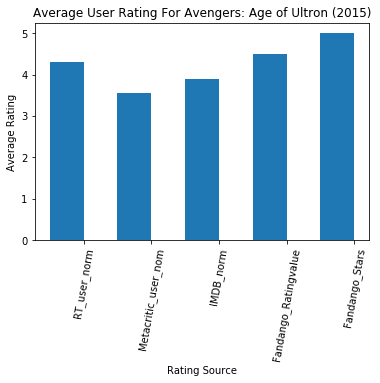

In [40]:
fig, ax = plt.subplots()

# Default width of bars is 0.8, here set to 0.5
ax.bar(bar_positions, bar_heights, 0.5)

# change the tick positions from default to this list
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
# change x axis tick labels
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
# rotate labels for readability
ax.set_xticklabels(num_cols, rotation=80)

# Set labels
plt.xlabel('Rating Source')
plt.ylabel('Average Rating')
plt.title('Average User Rating For Avengers: Age of Ultron (2015)')

plt.show()

Use ax.barh() to create a horizontal bar plot

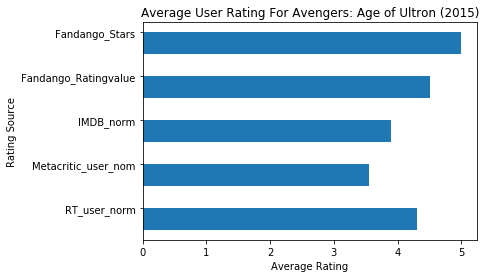

In [44]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
plt.ylabel('Rating Source')
plt.xlabel('Average Rating')
plt.title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites

Now to use a scatter plot to visualize many points. A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

The Axes.bar() method has 2 required parameters, left and height. The scatter() method has 2 required parameters, x and y, which matches the parameters of the plot() method. Both of these parameters accept a list-like object, which need to be the same length

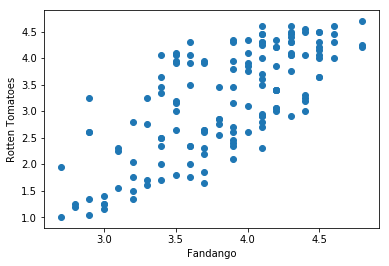

In [47]:
fig, ax = plt.subplots()
eks = norm_reviews['Fandango_Ratingvalue']
why = norm_reviews['RT_user_norm']
plt.scatter(eks, why)
plt.xlabel('Fandango')
plt.ylabel('Rotten Tomatoes')
plt.show()

Weak positive correlation

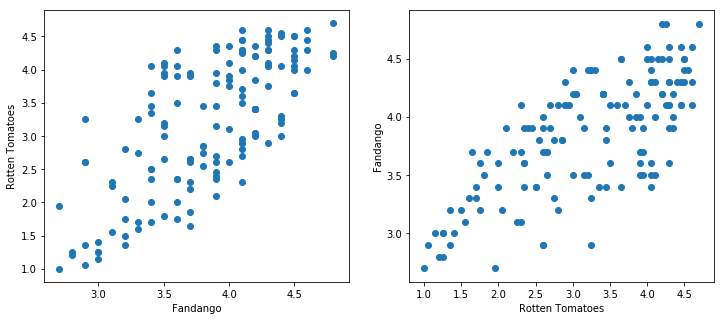

In [54]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fan = norm_reviews['Fandango_Ratingvalue']
rot = norm_reviews['RT_user_norm']

ax1.scatter(fan, rot)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')

ax2.scatter(rot, fan)
ax2.set_ylabel('Fandango')
ax2.set_xlabel('Rotten Tomatoes')

plt.show()

Switching the axes still shows a weak positive correlation

### Multiple Scatter Plots
When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes

A difference of 0.1 in a plot that only ranges from 4 to 5, instead of 0-5, is easily visible since the difference is 1/10th of the range.

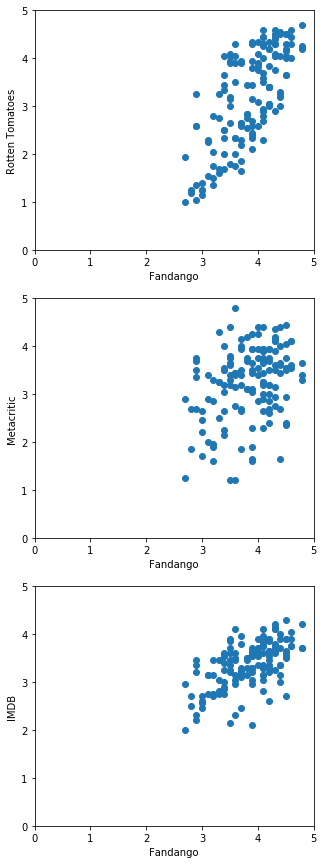

In [56]:
fig = plt.figure(figsize=(5,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

fan = norm_reviews['Fandango_Ratingvalue']
rot = norm_reviews['RT_user_norm']
met = norm_reviews['Metacritic_user_nom']
imd = norm_reviews['IMDB_norm']

ax1.scatter(fan, rot)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(fan, met)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(fan, imd)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

